### In this notebook, we have used the Lasso and Ridge regression models for prediction

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/opt/anaconda3/envs/p36_shv_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
data = pd.read_csv('Data/Real-Data/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [20]:
data=data.dropna()

In [21]:
X = data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
model_lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
model_lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
mse = cross_val_score(model_lr,X,Y,cv=5,scoring='neg_mean_squared_error')
mse.mean()

-4632.309383748412

### Ridge and Lasso Regressor algorithms

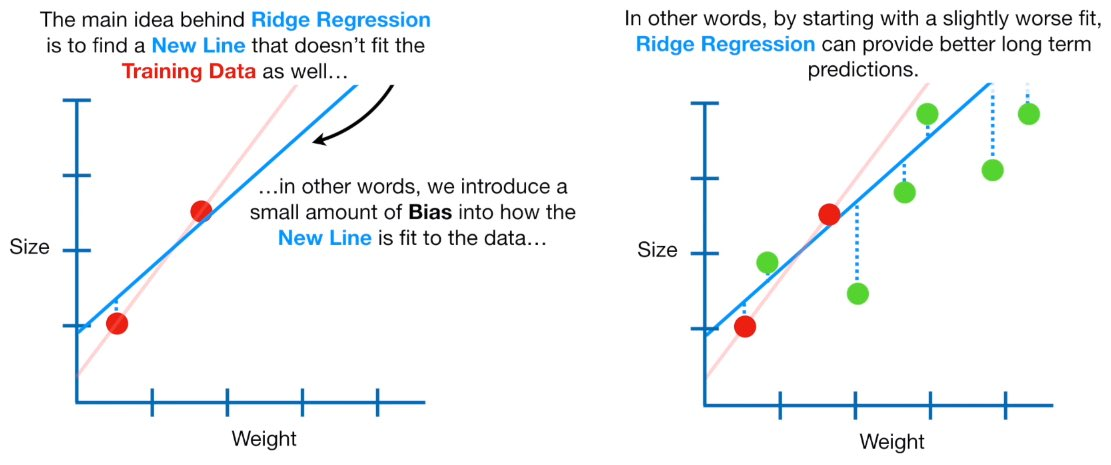

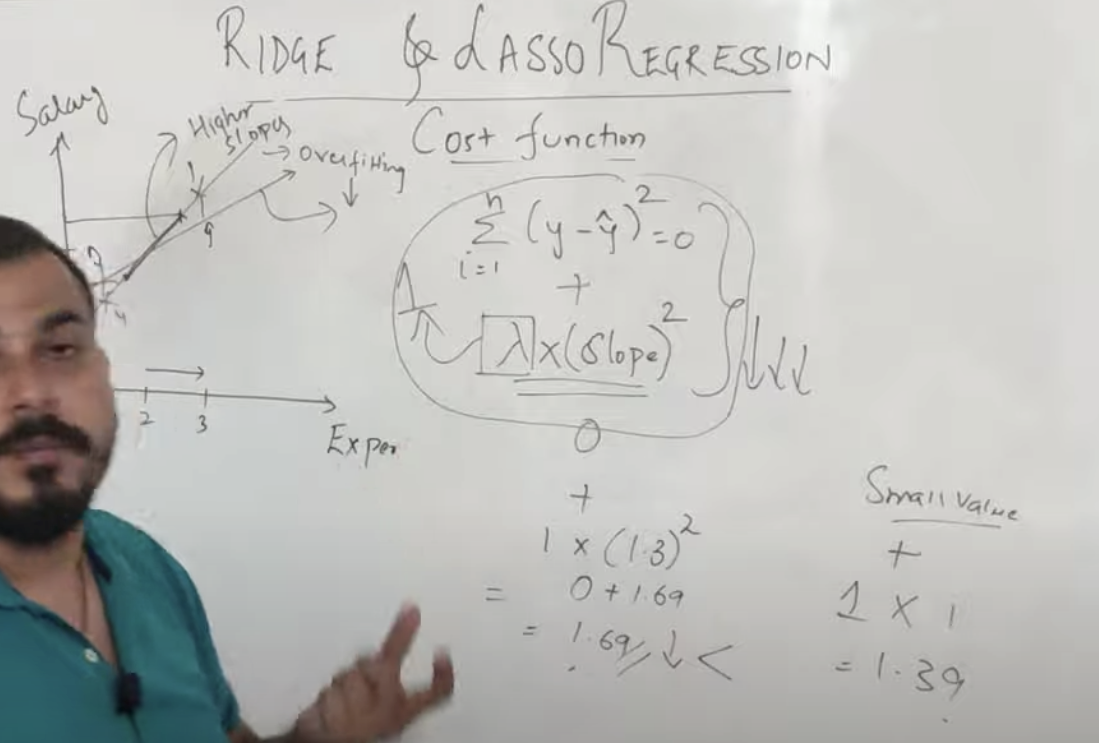

### Idea is basically to penalize the higher/Steeper slopes that we have, which causes the best-fit line to overfit.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # Since in Ridge and Lasso, we have to calculat the lambda value, we need to calc using hyperparameter tuning

In [39]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,12,15,18,20]}#,30,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   12, 15, 18, 20]},
             scoring='neg_mean_squared_error')

In [40]:
ridge_regressor.best_params_

{'alpha': 20}

In [41]:
ridge_regressor.best_score_

-4625.398256689974

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_test = ridge_regressor.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))
print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))
print("R^2  = ",r2_score(Y_test,y_pred_test))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

Mean Absoute Error =  50.75514140259275
Mean squared Error =  4372.132327158929
R^2  =  0.39350220121442736
RMSE =  66.1221016541287


### As seen above, we see that the score or mse has reduced however not to the greater extent

### Let's use the Lasso regressor now

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [47]:
lasso_regressor.fit(X,Y)
lasso_regressor.best_params_

/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1113878.1415315194, tolerance: 420.8872530976308
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025019.3365900796, tolerance: 380.84829544201204
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176898.7015628405, tolerance: 412.10048997202455
  positive)
/opt/anaconda3/envs/p36_shv_new/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not

{'alpha': 1}

In [48]:
lasso_regressor.best_score_

-4617.130372137594

In [50]:
import pickle

file = 'Lasso_Ridge_Regressor.sav'
pickle.dump(lasso_regressor,open(file,'wb'))

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_test = lasso_regressor.predict(X_test)

print("Mean Absoute Error = ",mean_absolute_error(Y_test,y_pred_test))
print("Mean squared Error = ",mean_squared_error(Y_test,y_pred_test))
print("R^2  = ",r2_score(Y_test,y_pred_test))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,y_pred_test)))

Mean Absoute Error =  50.572512197784505
Mean squared Error =  4357.529094694408
R^2  =  0.3955279469334828
RMSE =  66.01158303430094
